# Digits Recognition Using Sklearn Dataset Load_digits 

In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

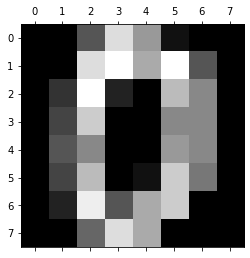

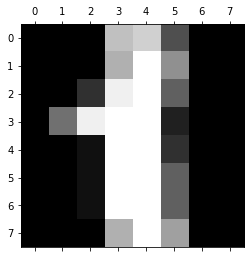

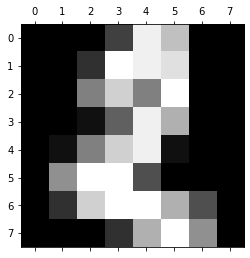

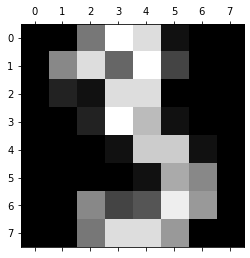

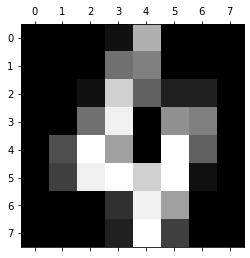

In [4]:
plt.gray()
for i in range(0,5):
    plt.matshow(digits.images[i] )

In [5]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [8]:
reg.fit(x_train,y_train)

c:\users\2019c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
len(x_train)

1437

In [10]:
len(y_test)

360

In [11]:
l = reg.predict(x_test)

In [12]:
reg.score(x_test,y_test)

0.9611111111111111

In [13]:
pf=pd.DataFrame(data=l,columns=['input'])
pf['ouput']=y_test
pf

,input,ouput
0,8,8
1,3,3
2,3,3
3,8,8
4,9,9
...,...,...
355,4,4
356,0,0
357,7,7
358,5,5


# How will I know Where my algorithm gone wrong

<Figure size 1440x864 with 0 Axes>

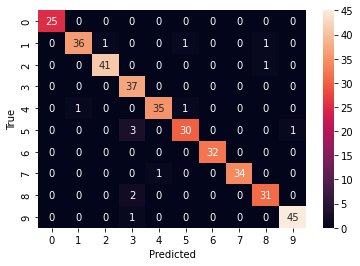

<Figure size 1440x864 with 0 Axes>

In [14]:
predicted=reg.predict(x_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predicted,y_test)
cm
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,12))

Above graph shows the number of times the y-axis number occured and number in related block shows the how many times it calculated it as x-axis number like in [0,0] the number is 47 i.e 0 was count 47 times as 0. Similarly bottom [9,1] block has number 1 i.e it predicted 9 as 1 one time 

# Classify iris plants into three species 
##### Download Dataset from This Site
https://www.kaggle.com/uciml/iris


In [15]:
df = pd.read_csv('iris.csv')

In [16]:
y=df['Species']

In [17]:
dum = pd.get_dummies(data=y,prefix='Species')
dum

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [18]:
df=pd.concat([df,dum],axis='columns')

In [19]:
X=df.drop(['Species','Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'],axis=1)

In [20]:
y=df.Species
dumm=pd.get_dummies(data=y)
dumm

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [21]:
y=dumm.drop(['Iris-virginica'],axis=1)

In [22]:
y

,Iris-setosa,Iris-versicolor
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,0,0
146,0,0
147,0,0
148,0,0


In [23]:
y=df.Species
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
reg.fit(x_train,y_train)

c:\users\2019c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
true=reg.predict(x_test)

In [26]:
reg.score(x_test,y_test)

1.0

## 100% Accuracy

In [27]:
cm=confusion_matrix(true,y_test)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

<AxesSubplot:>

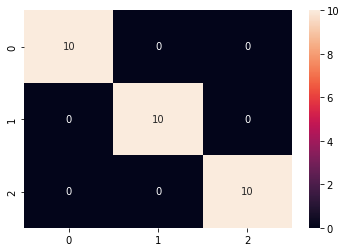

In [28]:
sns.heatmap(cm,annot=True)